# Importing Libraries

In [19]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import datetime
import warnings
warnings.filterwarnings("ignore")
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split

# Importing Dataset

In [20]:
imdb_data = pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv") 
X = imdb_data["review"]
y = imdb_data["sentiment"]
X.shape

(50000,)

# Data Preprocessing

In [21]:
max_number_words = 25000
max_len = 250

In [22]:
tokenizer=tf.keras.preprocessing.text.Tokenizer(num_words=max_number_words,filters="!@#$%^&*()<>{}[]''/?_+-=")
tokenizer.fit_on_texts(X)
word_index=tokenizer.word_index
print("No of Unique tokens",len(word_index))
X = tokenizer.texts_to_sequences(X)
X = tf.keras.utils.pad_sequences(X, maxlen=max_len)
print('Shape of data tensor:', X.shape)

No of Unique tokens 235535
Shape of data tensor: (50000, 250)


In [23]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

# Creating Training and Test Split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.25)

print("Training X: \t", X_train.shape)
print("Training y: \t", y_train.shape)
print("Testing X: \t", X_test.shape)
print("Testing y: \t", y_test.shape)

Training X: 	 (37500, 250)
Training y: 	 (37500,)
Testing X: 	 (12500, 250)
Testing y: 	 (12500,)


# Builing the RNN

In [25]:
model = tf.keras.Sequential()

## Layer 1 (Embedding Layer)

In [26]:
model.add(tf.keras.layers.Embedding(input_dim=max_number_words,output_dim=128,input_length=X.shape[1]))

## Layer 2 (Dropout)

In [27]:
model.add(tf.keras.layers.Dropout(0.2))

## Layer 3 (LSTM Layer)

In [28]:
model.add(tf.keras.layers.LSTM(units=128,activation="tanh",return_sequences=True))

## Layer 4 (SpatialDropout1D)

In [29]:
model.add(tf.keras.layers.SpatialDropout1D(0.2))

## Layer 5 (LSTM Layer)

In [30]:
model.add(tf.keras.layers.LSTM(units=64,activation="tanh"))

## Layer 6 (Output Layer)

In [31]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

## Compling the Model

In [32]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 250, 128)          3200000   
                                                                 
 dropout_1 (Dropout)         (None, 250, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 250, 128)          131584    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 250, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                      

# Training the RNN

In [34]:
earlyStopping =  tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_accuracy',restore_best_weights=True)

In [36]:
history = model.fit(X_train,y_train,epochs=10,batch_size=225,validation_split=0.4,callbacks=[earlyStopping])

Epoch 1/10
100/100 [==============================] - 17s 167ms/step - loss: 0.6194 - accuracy: 0.6456 - val_loss: 0.4637 - val_accuracy: 0.7849
Epoch 2/10
100/100 [==============================] - 13s 129ms/step - loss: 0.4261 - accuracy: 0.8116 - val_loss: 0.3754 - val_accuracy: 0.8366
Epoch 3/10
100/100 [==============================] - 12s 121ms/step - loss: 0.3349 - accuracy: 0.8616 - val_loss: 0.3699 - val_accuracy: 0.8417
Epoch 4/10
100/100 [==============================] - 12s 124ms/step - loss: 0.2755 - accuracy: 0.8921 - val_loss: 0.3476 - val_accuracy: 0.8615
Epoch 5/10
100/100 [==============================] - 10s 101ms/step - loss: 0.2478 - accuracy: 0.9047 - val_loss: 0.3433 - val_accuracy: 0.8611
Epoch 6/10
100/100 [==============================] - 10s 99ms/step - loss: 0.2065 - accuracy: 0.9234 - val_loss: 0.5263 - val_accuracy: 0.7957
Epoch 7/10
100/100 [==============================] - 9s 93ms/step - loss: 0.1802 - accuracy: 0.9343 - val_loss: 0.4466 - val_accur

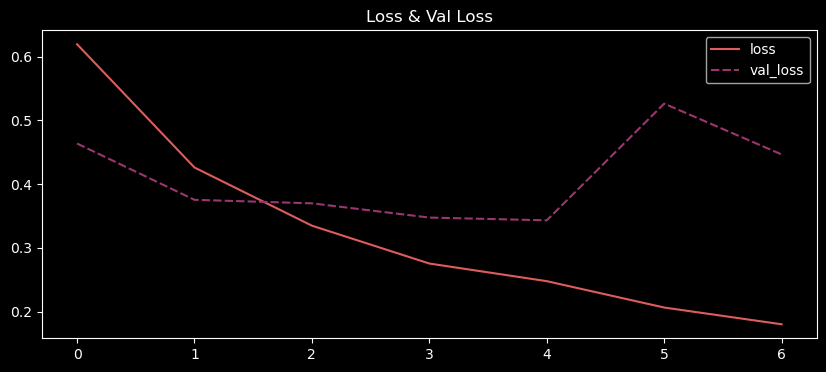

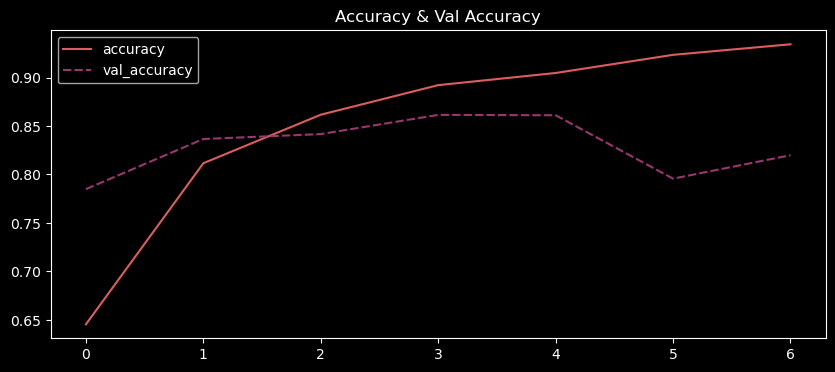

In [44]:
df = pd.DataFrame(history.history)
df_loss = df[['loss', 'val_loss']]
df_acc =  df[['accuracy', 'val_accuracy']]


plt.figure(figsize=(10,4))
sns.lineplot(df_loss,palette="flare")
plt.title("Loss & Val Loss")
plt.show();

plt.figure(figsize=(10,4))
sns.lineplot(df_acc,palette="flare")
plt.title("Accuracy & Val Accuracy");


# Evaluating the Model

In [45]:
evals = model.evaluate(X_test, y_test)

391/391 [==============================] - 5s 11ms/step - loss: 0.3330 - accuracy: 0.8660


In [47]:
print("Test Loss:", evals[0])
print("Test Accuracy:", evals[1])

Test Loss: 0.33301764726638794
Test Accuracy: 0.8659999966621399
